In [1]:
# 1ª - 
# a)
#   Nome: Autism-Child-Data.arff
#   Descrição: Children screening data for autism suitable for classification and predictive tasks
#   Volume de dados: 292
# b)
#   Principais colunas: 
#      austim: Determinação final se o jovem está ou não dentro do ASD (Autistic Spectrum Disorder)
#      Class/ASD: 
#      Result: Somatório dos resultados das perguntas relacionadas a detecção do TEA. 
# c)
#   Objetivo do dataset: 
#      Identificar a presença do autismo em jovens por base em perguntas e características
#      clinicamente validadas para esse fim. 

In [61]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('Autism-Child-Data.arff')
df = pd.DataFrame(data[0])
dfb = df.copy()
dfb.drop(dfb.columns[[10, 17]], axis=1, inplace=True)
dfb.head(2)
for column in dfb.columns:
    dfb[column] = dfb[column].str.decode('utf-8') 

df.update(dfb)
df.head(3)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5.0,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5.0,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5.0,'4-11 years',?,NO


In [14]:
# 2ª Questão
# a) Tipo das colunas
df.dtypes
# b) Campos nulos
for field in df.columns:
    print('Coluna:', field,'|Qtd nulos:', df[field].isnull().sum())
# c) Variáveis categóricas
# d) Campos novos criados com justificativa
df['born_case'] = df['Class/ASD']
for i in range(len(df['Class/ASD'])):
    df['born_case'][i] = 'yes' if (df['jundice'][i].lower() == 'yes'\
                                   and df['Class/ASD'][i].lower() == 'yes') else 'no'
# Novo campo: born_case.
# Razão: análise de caso de nascimento com icteria do jovem e se algum parente dele foi anteriormente
# Diagnósticado com desordem de desenvolvimento pervasivo, o que pode aumentar as chances do jovem ser propenso
# a o TEA.
y = df['austim']
x = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score',\
        'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'contry_of_res', \
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD', 'born_case']]
# e) Campos descartados com justificativa
# Campos retirados: 
#      Scores. Razão: Importância final deles para este cenário se baseia no result.
#      age_desc. Razão: Todos os dados coletados são de jovens na faixa de 4 a 11 anos,
#      sendo a única existente na coluna do dataset.
x.drop(x.columns[0:10], axis=1, inplace=True)
x.drop(x.columns[7], axis=1, inplace=True)
x = pd.get_dummies(x)

Coluna: A1_Score |Qtd nulos: 0
Coluna: A2_Score |Qtd nulos: 0
Coluna: A3_Score |Qtd nulos: 0
Coluna: A4_Score |Qtd nulos: 0
Coluna: A5_Score |Qtd nulos: 0
Coluna: A6_Score |Qtd nulos: 0
Coluna: A7_Score |Qtd nulos: 0
Coluna: A8_Score |Qtd nulos: 0
Coluna: A9_Score |Qtd nulos: 0
Coluna: A10_Score |Qtd nulos: 0
Coluna: age |Qtd nulos: 4
Coluna: gender |Qtd nulos: 0
Coluna: ethnicity |Qtd nulos: 0
Coluna: jundice |Qtd nulos: 0
Coluna: austim |Qtd nulos: 0
Coluna: contry_of_res |Qtd nulos: 0
Coluna: used_app_before |Qtd nulos: 0
Coluna: result |Qtd nulos: 0
Coluna: age_desc |Qtd nulos: 0
Coluna: relation |Qtd nulos: 0
Coluna: Class/ASD |Qtd nulos: 0
Coluna: born_case |Qtd nulos: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


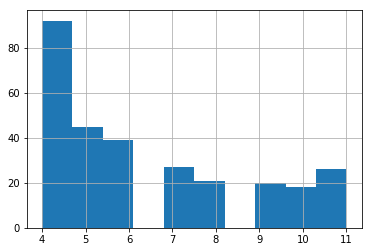

{'whiskers': [<matplotlib.lines.Line2D at 0x7f85ca5dc240>,
 'caps': [<matplotlib.lines.Line2D at 0x7f85ca5dc8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f85ca5dc0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f85ca5dcf60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f85ca5da2e8>],
 'means': []}

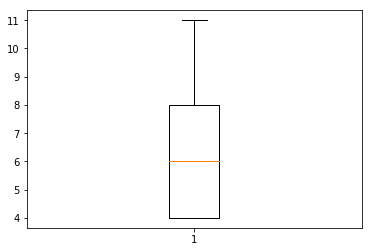

In [17]:
# f) Conversões entre tipos de colunas
cont = 1
for column in df.columns:
    df[column] = pd.to_numeric(df[column])
    cont += 1
    if (cont == 10):
        break
df.dtypes
# g) Técnica de análise não apresentada em sala
# pd.value_counts(df['age'])

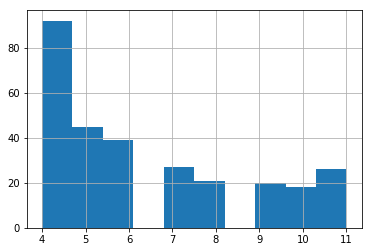

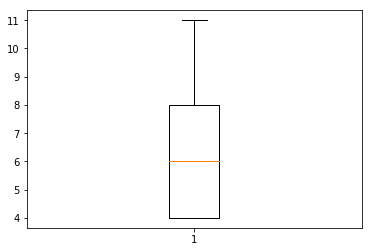

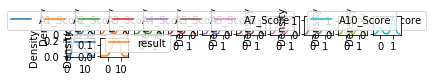

In [40]:
import matplotlib.pyplot as plt
# h) Analise, com APIs específicas, pelo menos 3 características relevantes do
#    dataset e exiba gráficos a respeito
df['age'].hist()
plt.show()
df_age = df['age'].dropna()
plt.boxplot(df_age, showfliers= True)

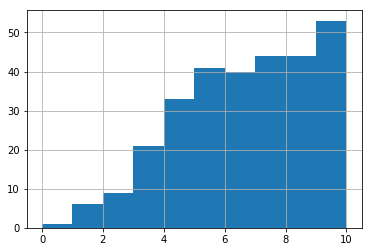

{'whiskers': [<matplotlib.lines.Line2D at 0x7f85cb1a5c18>,
 'caps': [<matplotlib.lines.Line2D at 0x7f85cb7e32e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f85cb1a5ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f85cb7e3978>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f85cb7e3cc0>],
 'means': []}

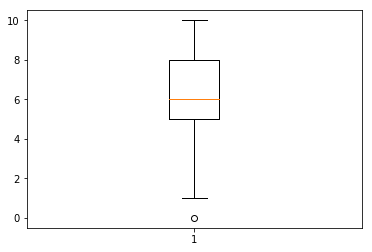

In [49]:
df['result'].hist()
plt.show()

df_result = df['result'].dropna()
plt.boxplot(df_result, showfliers= True)

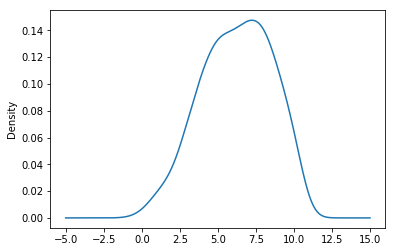

In [48]:
data = df['result']
data.plot(kind='density', subplots=True, layout=(1,1), sharex=False)
plt.show()

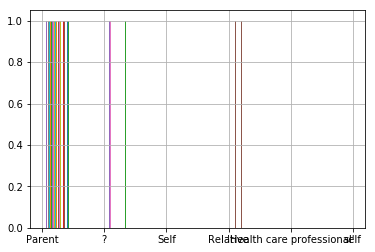

In [33]:
df['relation'].hist()
plt.show()
# df_relation = df['relation'].dropna()
# plt.boxplot(df_relation, showfliers= True)

In [ ]:
# 3ª) 

from sklearn import tree

from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.20, random_state=0)

model = tree.DecisionTreeClassifier(criterion='gini')
model.fit(x_treino, y_treino)
model.score(x_treino, y_treino)

pd.crosstab(y_teste, model.predict(x_teste), rownames=['Real'], colnames=['Predito'], margins=True)
confusion_matrix(y_teste, model.predict(x_teste))

10


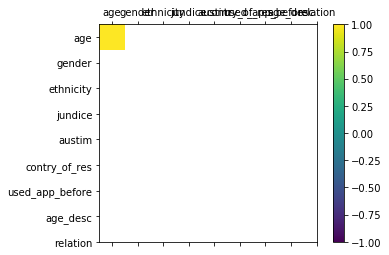

In [85]:
import numpy
# 4ª)
names = [column for column in df.columns]
print(len(df.columns))
def tratar_colunas(df):
    if (len(df.columns) == 21):
        df.drop(df.columns[0:10], axis=1, inplace=True)
        df.drop(df.columns[7], axis=1, inplace=True)
    return df
df = tratar_colunas(df)
correlations = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [86]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(x, y, test_size=0.25, random_state=0)
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(X_treino, Y_treino)
modelo.score(X_teste, Y_teste)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [1]:
# from arff2pandas import a2p
# with open('Autism-Child-Data.arff') as f:
#     df = a2p.load(f)
# df.head(3)
# filtered_df = df[(df['austim@{no,yes}'] == 'yes') & (df['result@NUMERIC'] >= 5)].filter(like='austim').count()
# filtered_df